# **Section 5. Perceptron**

Perceptron is a linear classifier. Binary classification, targets are $\{-1,+1\}$. Parameters are the $w$ weights and $b$ bias. (We can merge the bias term into $w$.) Prediction:

\begin{align}
w^T x + b
\begin{cases}
> 0, \quad \text{predict $+1$}, \\
< 0, \quad \text{predict $-1$}, \\
= 0, \quad \text{falling directly on the classification boundary hyperplane}.
\end{cases}
\end{align}

Training the perceptron ($b$ included in $w$), using a randomly selected misclassified sample $(x,y)$:

\begin{align}
w_{i+1} = w_i - \eta xy,
\end{align}

where $\eta$ is the learning rate.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
class Perceptron:
  @staticmethod
  def add_ones(X):
    if X.ndim == 1:
      X.shape = [1,X.shape[0]]
    return np.column_stack( (np.ones(X.shape[0]),X) )
  
  def fit(self,X,y,learning_rate=0.01,max_iter=1000):
    Xb = self.add_ones(X)
    
    N = len(y)
    D = X.shape[1]
    self.w = np.random.randn(D+1)/np.sqrt(D)
    self.w[0] = 0

    self.costs = []
    for i in range(max_iter):
      yhat = self.predict(X)
      misclassified = np.where(y != yhat)[0]
      if len(misclassified) == 0:
        break

      index = np.random.choice(misclassified)
      x0, y0 = Xb[index], y[index]
      self.w = self.w + learning_rate * x0*y0
      self.costs.append(len(misclassified) / float(N))

  def predict(self,X):
    Xb = self.add_ones(X)
    return np.sign(Xb @ self.w)

  def score(self,X,y):
    return np.mean( self.predict(X) == y )

In [ ]:
# Generating data
w = np.array([-0.5,0.5])
b = 0.1

X = np.random.random((300,2))*2 - 1
y = np.sign(X @ w + b)


1.0
[ 0.09       -0.46238602  0.458179  ]


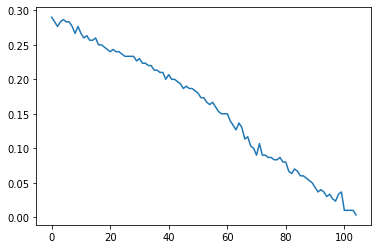

In [ ]:
model = Perceptron()

model.fit(X,y)
print(model.score(X,y))
print(model.w)

plt.plot(model.costs)

## **Perceptron for XOR dataset**

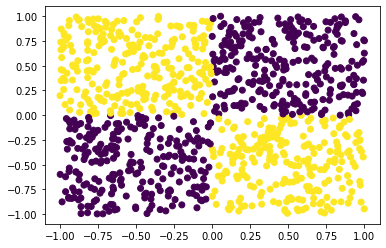

In [ ]:
# Generating the XOR dataset

N = 1000
X = (2*np.random.random((N,2)) - 1)
Y = np.zeros(N)
Y = (X[:,0] > 0) ^ (X[:,1] > 0)
Y = np.array(Y,dtype=int)
Y[Y==0] = -1

plt.scatter(X[:,0],X[:,1],c=Y);

In [ ]:
model.fit(X,Y)
model.score(X,Y)

0.49

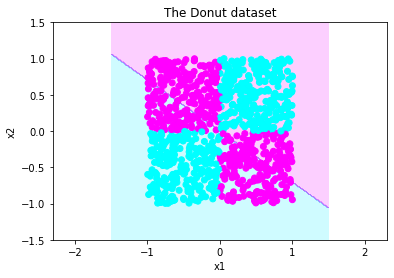

In [ ]:
x_plot = y_plot = np.linspace(-1.5, 1.5, 200)

z = np.array([model.predict(np.array([i,j])) for j in y_plot for i in x_plot])
Z = z.reshape(200,200)

mesh_x, mesh_y = np.meshgrid(x_plot, y_plot)

ax = plt.axes(xlabel='x1',ylabel='x2',title='The Donut dataset')
ax.axis('equal') # Setting axis scales equal, so the donut is really circular

plt.contourf(x_plot,y_plot,Z,alpha=0.2,cmap='cool')
plt.scatter(X[:,0],X[:,1],c=Y,cmap='cool')

## **Perceptron for the MNIST dataset**

In [ ]:
from keras.datasets import mnist

(train_X, train_y), (test_X, test_y) = mnist.load_data()

# reshaping arrays in the usual feature matrix form
train_X = train_X.reshape(len(train_X),28*28) #/ 255.
test_X = test_X.reshape(len(test_X),28*28) #/ 255.

# binary classification
idx = np.logical_or(train_y == 0, train_y == 1)
train_X = np.array(train_X[idx],dtype=int)
train_y = np.array(train_y[idx],dtype=int)
# setting 0 to -1 work with perceptron algorithm
train_y[train_y == 0] = -1

# binary classification
idx = np.logical_or(test_y == 0, test_y == 1)
test_X = np.array(test_X[idx],dtype=int)
test_y = np.array(test_y[idx],dtype=int)
# setting 0 to -1 work with perceptron algorithm
test_y[test_y == 0] = -1


Train score: 1.0
Test score: 0.9990543735224586


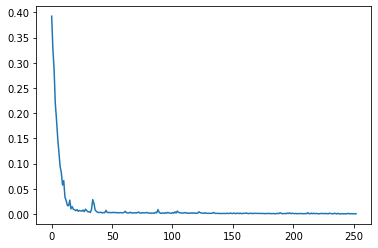

In [ ]:
model.fit(train_X,train_y,learning_rate=1e-5,max_iter=1000)
print("Train score:",model.score(train_X,train_y))
print("Test score:",model.score(test_X,test_y))
plt.plot(model.costs)